<p align="center">
  <br/>
    <a href="https://pdf-redaction.com/" target="_blank"><img alt="PDF Redaction"
    src="https://pdf-redaction.com/images/pdf-redaction-logo.svg" width="450" style="max-width: 100%;"></a>
  <br/>
</p>

<p align="center">
    <i>Secure Your PDFs with AI-powered Redaction</i>
</p>

<p align="center">
    <a target="_blank" href="https://colab.research.google.com/github/StabRise/pdf-redaction-api/blob/main/jupyter/PDF-Redaction-API.ipynb">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://github.com/stabrise/spark-pdf/blob/main/LICENSE"><img alt="GitHub" src="https://img.shields.io/github/license/stabrise/spark-pdf.svg?color=blue"></a>
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.
io/badge/powered%20by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=blue"/></a>

</p>

# Example of using PDF Redaction API

[Swagger API documentation](https://api.pdf-redaction.com/api/docs)

[https://pdf-redaction.com](https://pdf-redaction.com)


> Limitations for free version:
>  * 1 page per request
>  * 1 requests per minute


In [ ]:
%pip install requests pdf2image pillow

# Display original PDF

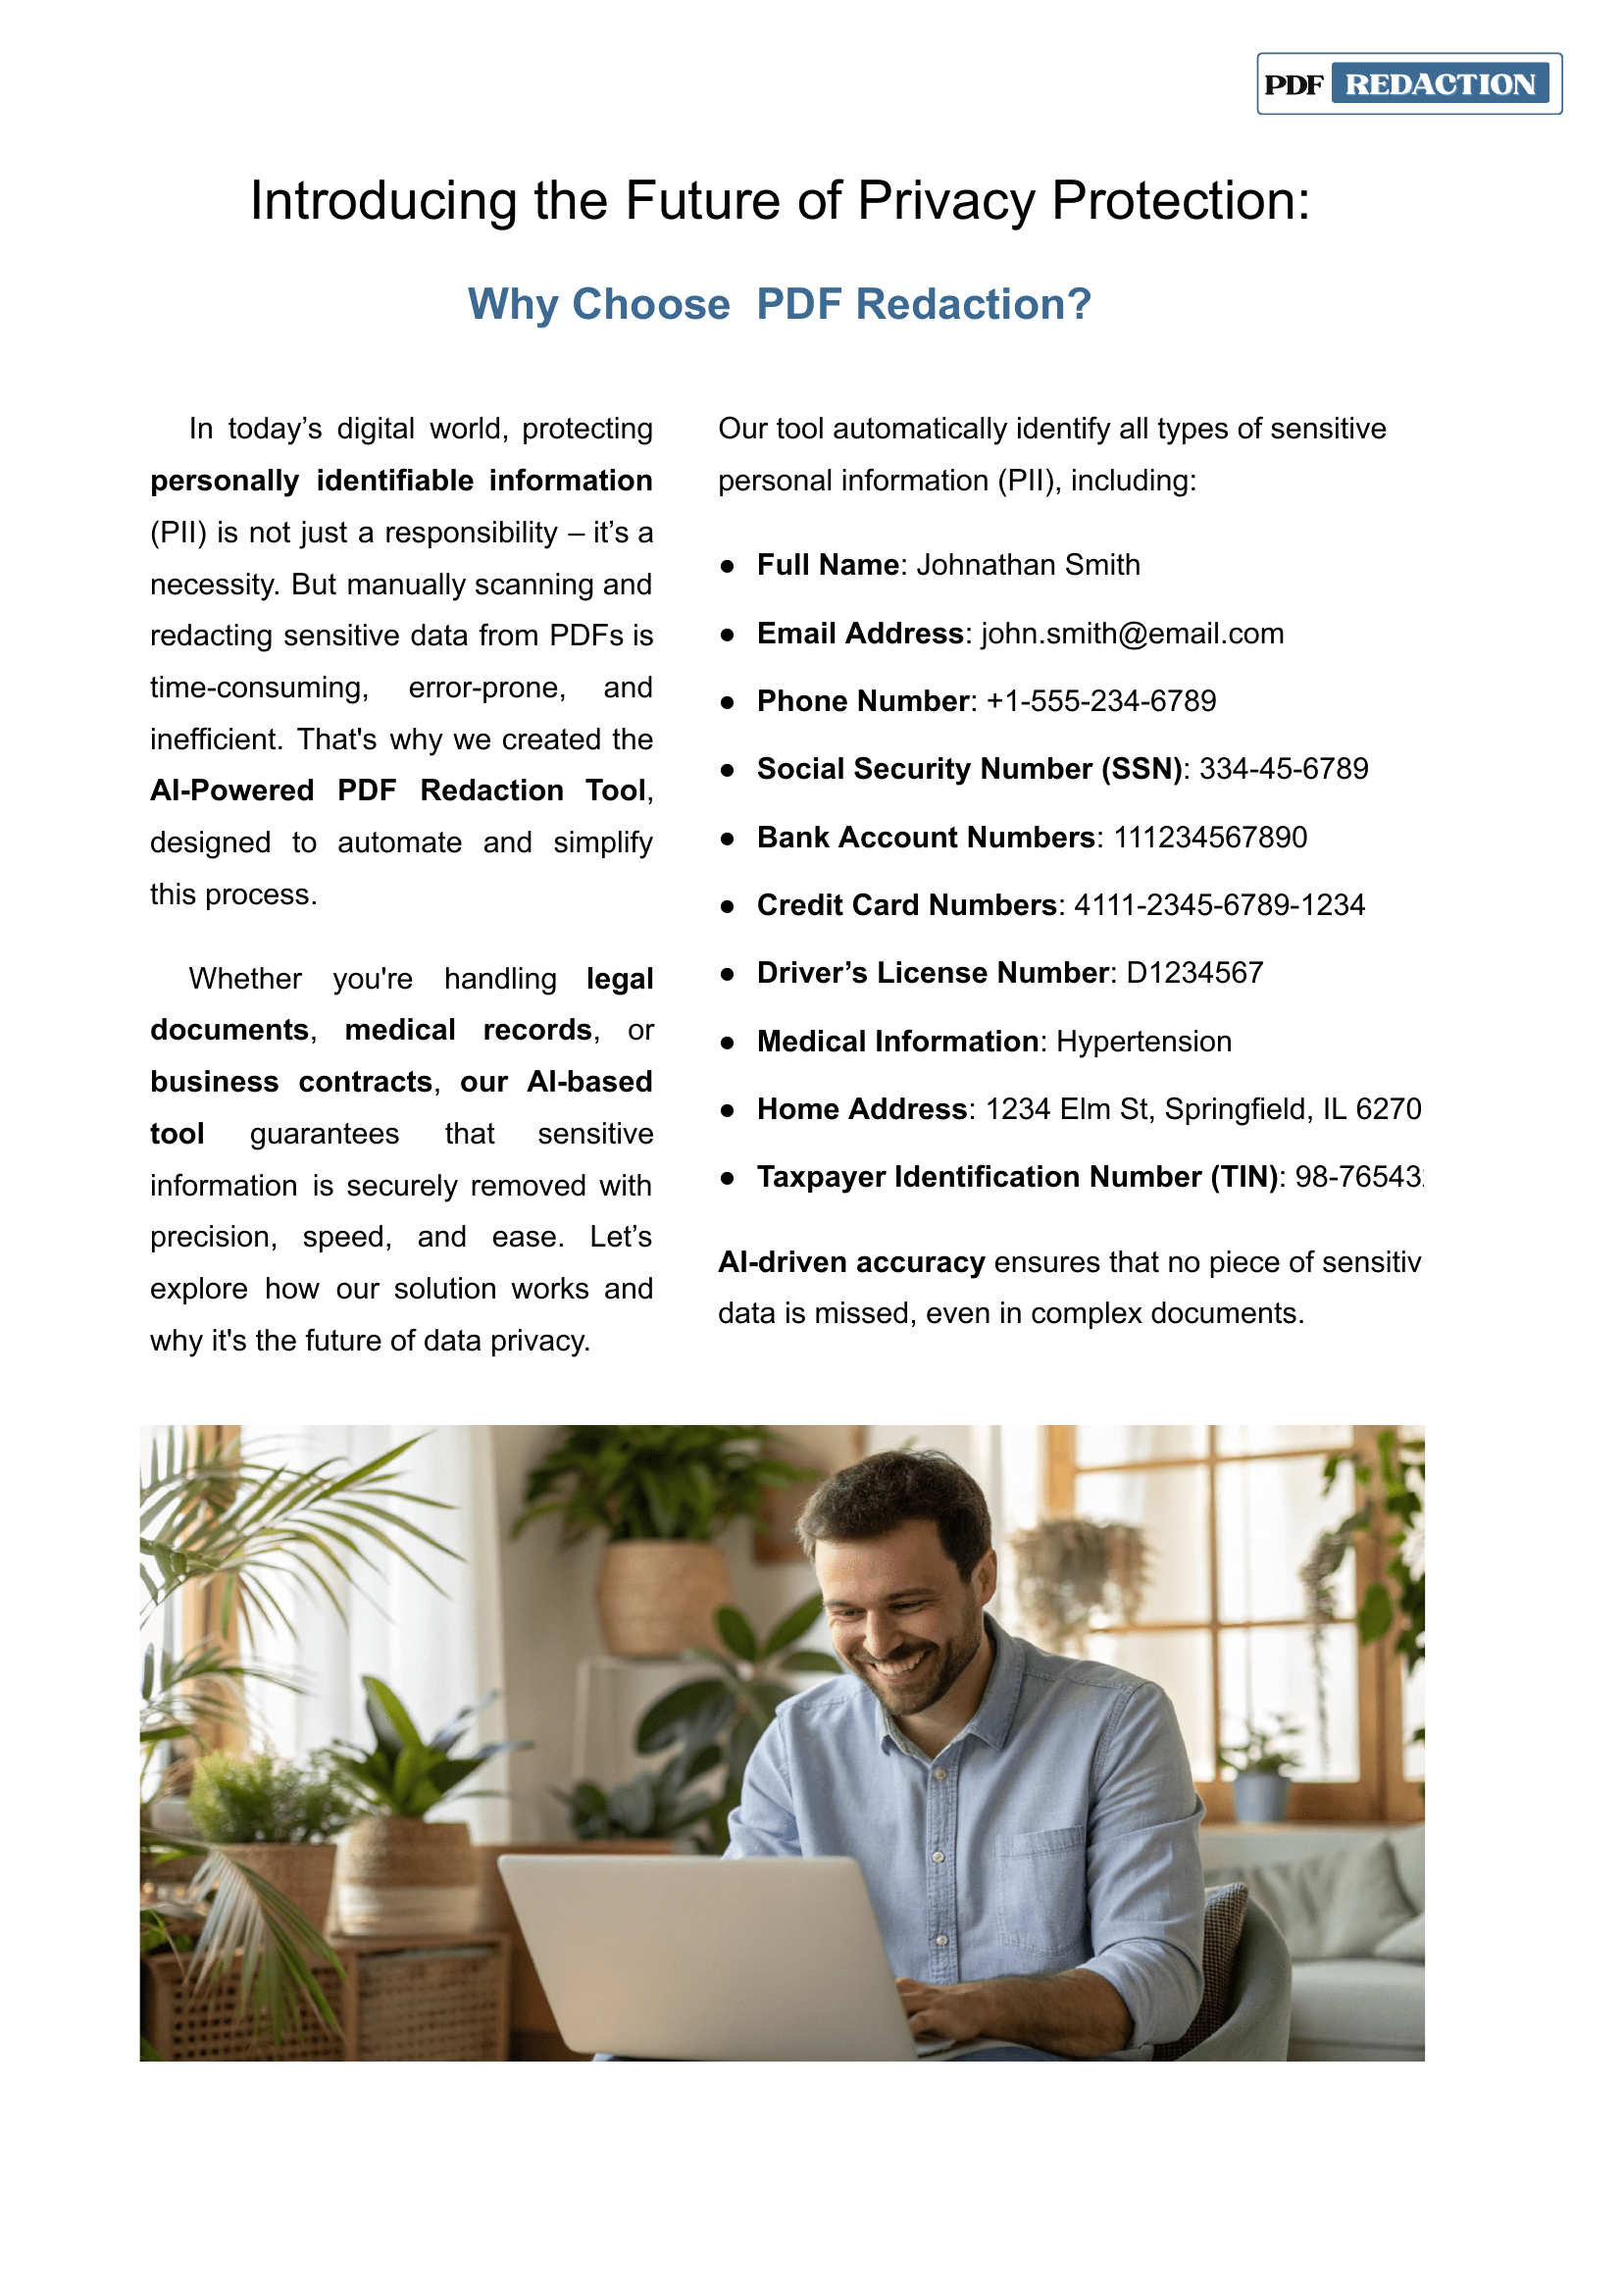

In [18]:
from pdf2image import convert_from_path
from PIL import Image
from IPython.display import display

# File path to your PDF
file_path = "../examples/pdfs/sample_document_en.pdf"

def display_pdf(pdf_path):
    """Display first page of the pdf file"""
    # Convert first page of PDF to image
    pages = convert_from_path(pdf_path, first_page=1, last_page=1)  # returns a list of PIL Images

    # Display first page
    display(pages[0])

display_pdf(file_path)

# Redact PDF using API

In [19]:
import requests
from pathlib import Path

api_url = "https://api.pdf-redaction.com/api/anonymize/file/pdf"

# Create output directory path
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)  # Create output directory if it doesn't exist

# Compute output file name based on input file name
input_file = Path(file_path)
output_file_path = output_dir / f"redacted_{input_file.name}"

headers = {
    "accept": "application/pdf"
}

with open(file_path, "rb") as f:
    files = {
        "pdf": ("sample_document.pdf", f, "application/pdf")
    }
    response = requests.post(api_url, headers=headers, files=files)

print("Status code:", response.status_code)

# Save the redacted PDF to a file
if response.status_code == 200:
    with open(output_file_path, "wb") as out:
        out.write(response.content)
    print(f"Redacted PDF saved as '{output_file_path}'.")
else:
    print("Error:", response.text)

Status code: 200
Redacted PDF saved as 'output/redacted_sample_document_en.pdf'.


## Display redacted PDF

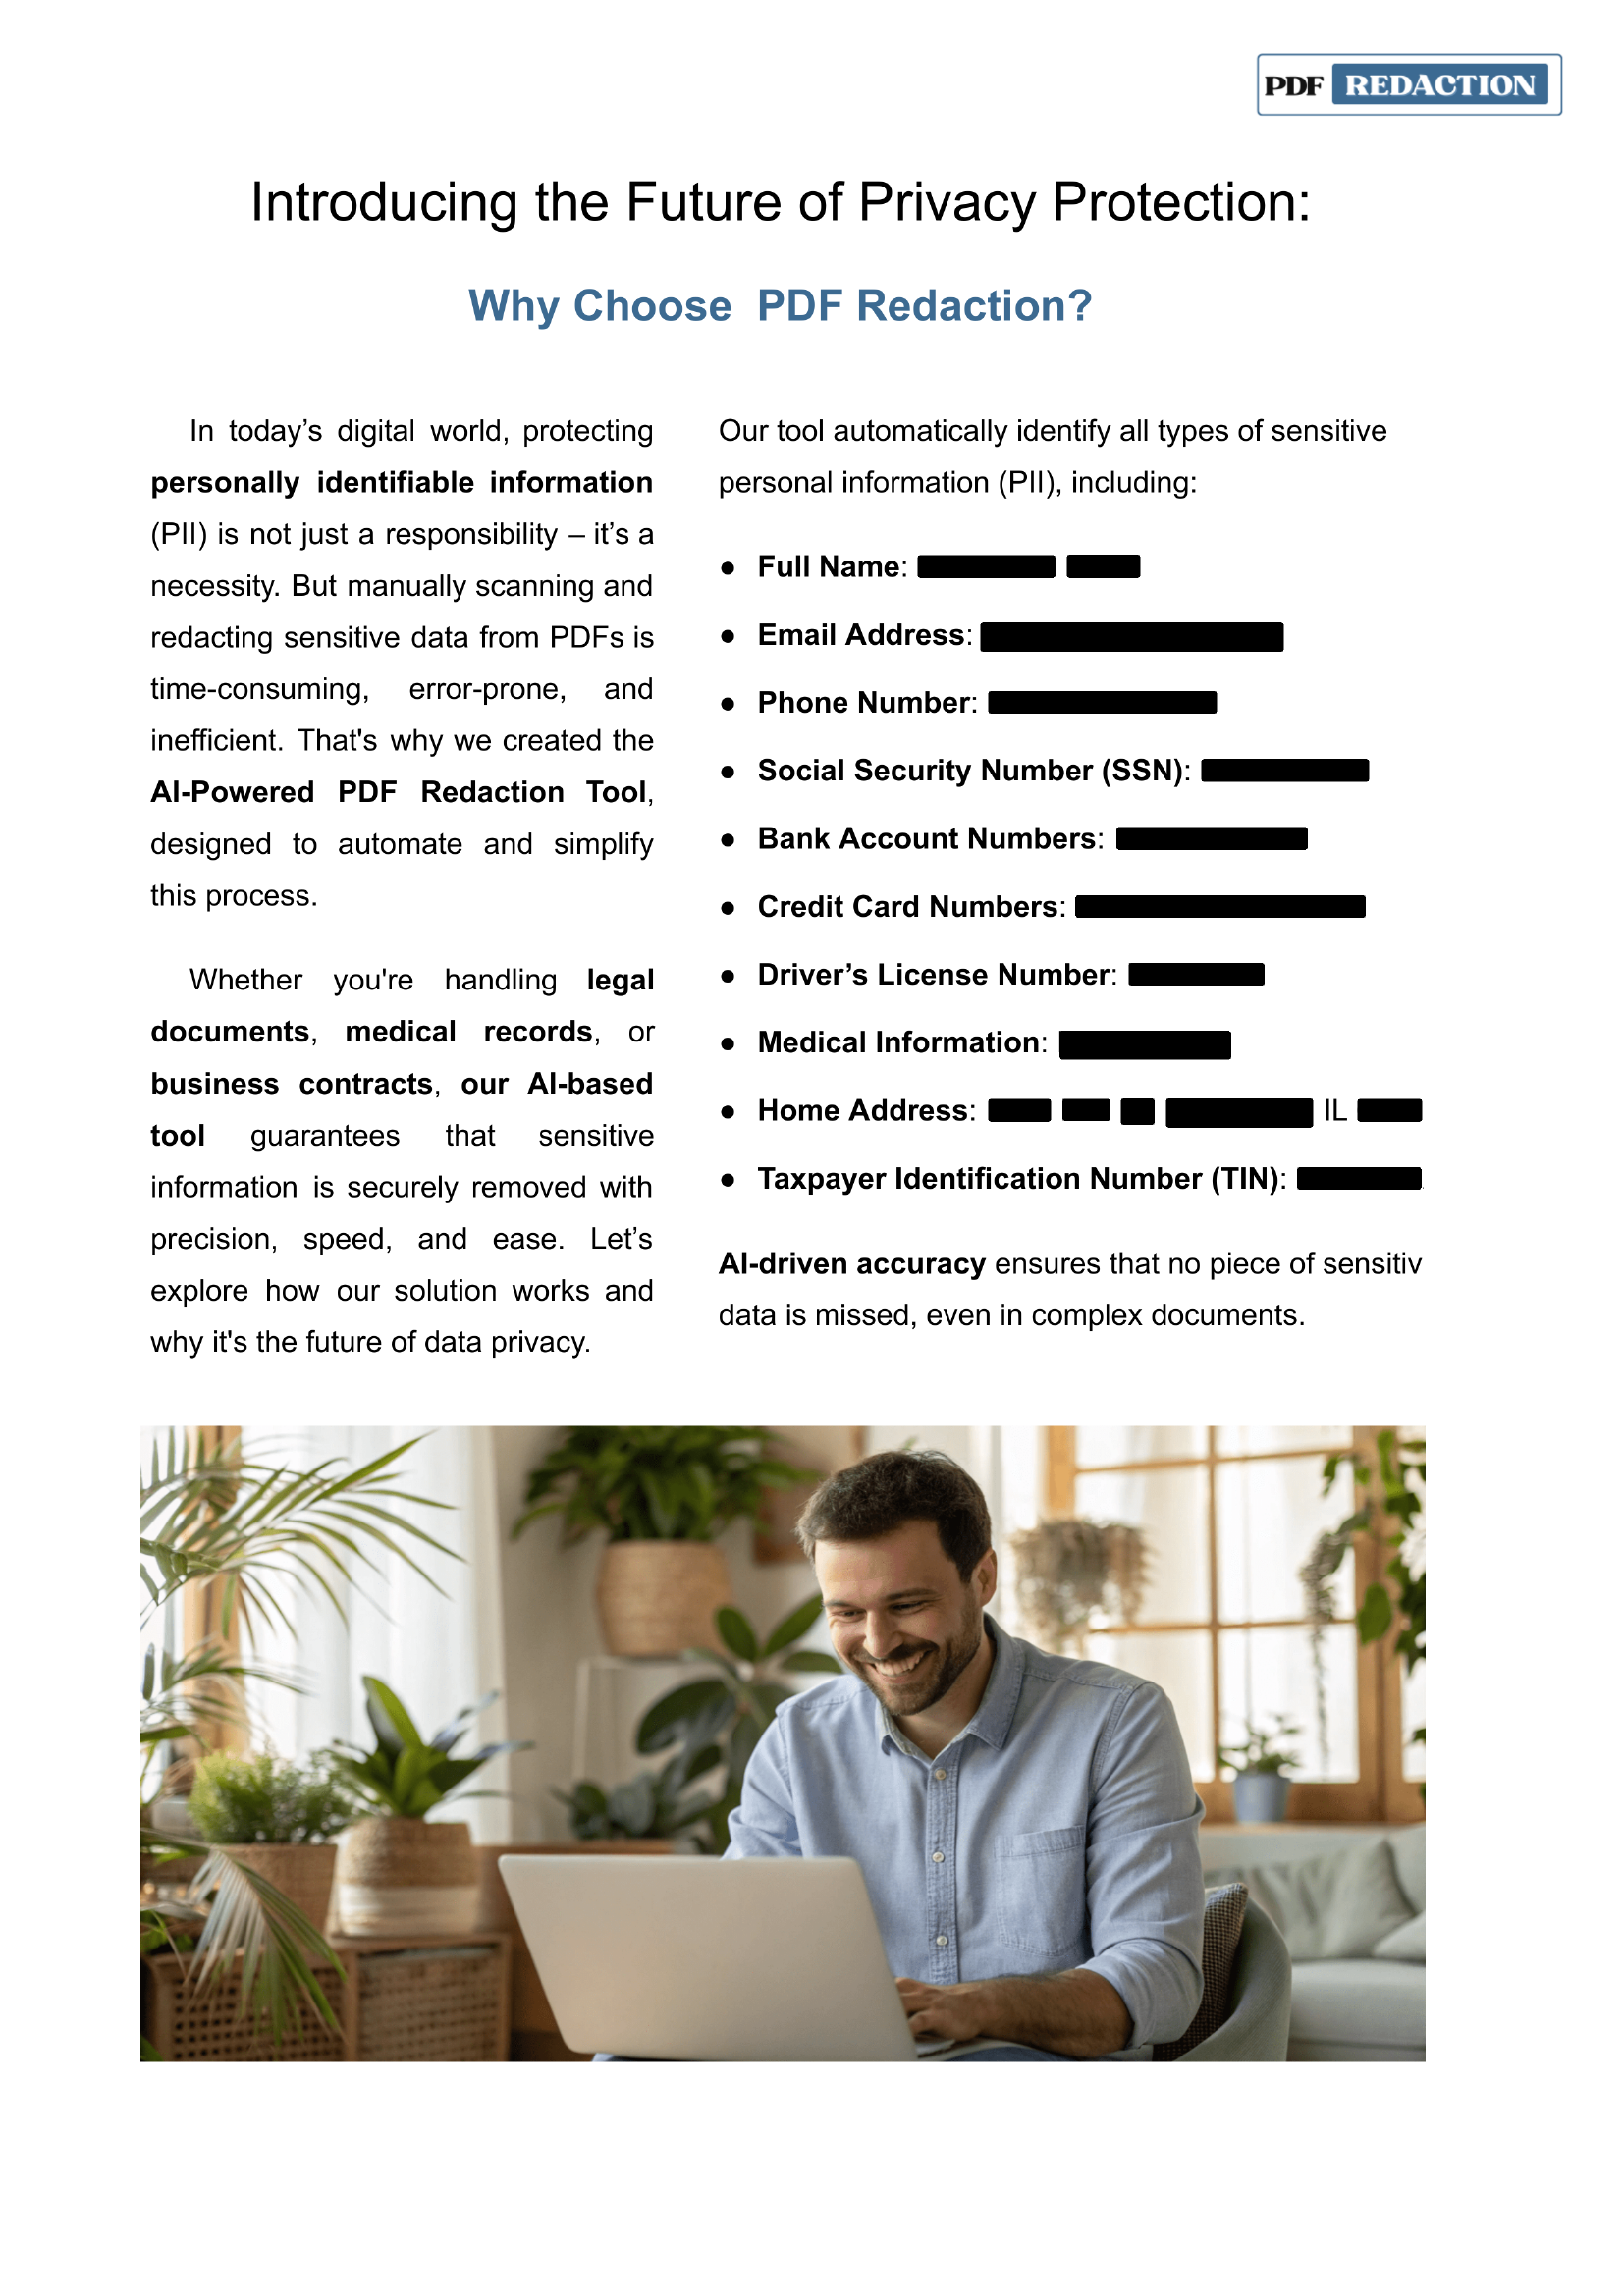

In [20]:
display_pdf(output_file_path)